In [99]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [100]:
goog_df = pd.read_csv(Path("/Users/Hockenbery/fintech/Python_Project/Project-2/GOOG.csv"),
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

In [101]:
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-16,849.030029,850.849976,846.130005,848.780029,848.780029,977600
2017-03-17,851.609985,853.400024,847.109985,852.119995,852.119995,1712300
2017-03-20,850.010010,850.219971,845.150024,848.400024,848.400024,1231500
2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500
2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500


<AxesSubplot:xlabel='Date'>

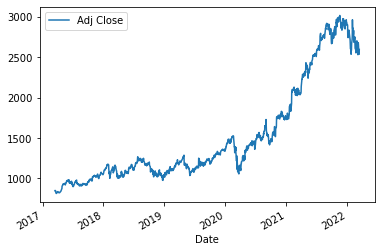

In [102]:
goog_df.plot(y='Adj Close')

In [103]:
exp1 = goog_df.Close.ewm(span=12, adjust=False).mean()
exp2 = goog_df.Close.ewm(span=26, adjust=False).mean()

In [104]:
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
goog_df['macd'] = macd
goog_df['exp3'] = exp3
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume,macd,exp3
Date,,,,,,,,
2017-03-16,849.030029,850.849976,846.130005,848.780029,848.780029,977600,0.000000,0.000000
2017-03-17,851.609985,853.400024,847.109985,852.119995,852.119995,1712300,0.266436,0.053287
2017-03-20,850.010010,850.219971,845.150024,848.400024,848.400024,1231500,0.175396,0.077709
2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500,-1.329042,-0.203641
2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500,-2.561988,-0.675310


In [105]:
goog_df.hvplot.line(y=['macd', 'exp3'])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [106]:
goog_df["Actual Returns"] = goog_df["Close"].pct_change()

In [107]:
goog_df['Signal'] = 0.0
goog_df.loc[(goog_df['Actual Returns'] >= 0), 'Signal'] = 1
goog_df.loc[(goog_df['Actual Returns'] < 0), 'Signal'] = -1
goog_df = goog_df.dropna()
display(goog_df.head())
display(goog_df.tail())

,Open,High,Low,Close,Adj Close,Volume,macd,exp3,Actual Returns,Signal
Date,,,,,,,,,,
2017-03-17,851.609985,853.400024,847.109985,852.119995,852.119995,1712300,0.266436,0.053287,0.003935,1.0
2017-03-20,850.010010,850.219971,845.150024,848.400024,848.400024,1231500,0.175396,0.077709,-0.004366,-1.0
2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500,-1.329042,-0.203641,-0.021146,-1.0
2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500,-2.561988,-0.675310,-0.001048,-1.0
2017-03-23,821.000000,822.570007,812.257019,817.580017,817.580017,3487100,-4.456838,-1.431616,-0.014477,-1.0


,Open,High,Low,Close,Adj Close,Volume,macd,exp3,Actual Returns,Signal
Date,,,,,,,,,,
2022-03-10,2629.250000,2670.770020,2628.020020,2653.639893,2653.639893,1213300,-31.123714,-31.849788,-0.008845,-1.0
2022-03-11,2679.989990,2684.000000,2605.929932,2609.510010,2609.510010,1328500,-31.604403,-31.800711,-0.016630,-1.0
2022-03-14,2611.459961,2620.520020,2528.260010,2534.820068,2534.820068,1512700,-37.579019,-32.956373,-0.028622,-1.0
2022-03-15,2554.830078,2610.344971,2531.360107,2593.209961,2593.209961,1513700,-37.173852,-33.799869,0.023035,1.0
2022-03-15,2554.830078,2610.344971,2531.360107,2593.209961,2593.209961,1514630,-36.432780,-34.326451,0.000000,1.0


In [108]:
X = goog_df[['macd', 'exp3']].shift().dropna()
X.head()

,macd,exp3
Date,,
2017-03-20,0.266436,0.053287
2017-03-21,0.175396,0.077709
2017-03-22,-1.329042,-0.203641
2017-03-23,-2.561988,-0.675310
2017-03-24,-4.456838,-1.431616


In [109]:
y = goog_df['Signal']
y.value_counts()

 1.0    693
-1.0    566
Name: Signal, dtype: int64

In [110]:
training_begin = X.index.min()
print(training_begin)

2017-03-20 00:00:00


In [111]:
training_end = X.index.min() + DateOffset(months=3)
print(training_end)

2017-06-20 00:00:00


In [112]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_train.head()

,macd,exp3
Date,,
2017-03-20,0.266436,0.053287
2017-03-21,0.175396,0.077709
2017-03-22,-1.329042,-0.203641
2017-03-23,-2.561988,-0.675310
2017-03-24,-4.456838,-1.431616


In [113]:
X_test = X.loc[training_end + DateOffset(hours=1):]
y_test = y.loc[training_end + DateOffset(hours=1):]
X_test.head()

,macd,exp3
Date,,
2017-06-21,6.363105,11.642294
2017-06-22,6.316986,10.577233
2017-06-23,6.020603,9.665907
2017-06-26,6.397846,9.012294
2017-06-27,5.557932,8.321422


In [114]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [115]:
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [116]:
svm_testing_report = classification_report(y_test, svm_pred)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.38      0.01      0.02       540
         1.0       0.55      0.98      0.70       653

    accuracy                           0.54      1193
   macro avg       0.46      0.50      0.36      1193
weighted avg       0.47      0.54      0.39      1193



In [117]:
goog_df.index.is_unique

False

In [118]:
goog_df.index.duplicated()

array([False, False, False, ..., False, False,  True])

In [124]:
goog_df = goog_df.loc[~goog_df.index.duplicated(), :]

In [120]:
predictions_df = pd.DataFrame(index = X_test.index)
predictions_df['Predicted'] = svm_pred
predictions_df.index.is_unique

False

In [121]:
predictions_df.index.duplicated()

array([False, False, False, ..., False, False,  True])

In [125]:
predictions_df = predictions_df.loc[~predictions_df.index.duplicated(), :]

In [126]:
predictions_df['Actual Returns'] = goog_df['Actual Returns']
predictions_df['Strategy Returns'] = (
    predictions_df['Actual Returns'] * predictions_df['Predicted']
)
display(predictions_df.head())
display(predictions_df.tail())

/var/folders/b8/s7fb18b52b55x0vh8h1qdpm80000gq/T/ipykernel_45346/3790382374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['Actual Returns'] = goog_df['Actual Returns']
/var/folders/b8/s7fb18b52b55x0vh8h1qdpm80000gq/T/ipykernel_45346/3790382374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['Strategy Returns'] = (


,Predicted,Actual Returns,Strategy Returns
Date,,,
2017-06-21,1.0,0.009278,0.009278
2017-06-22,1.0,-0.002460,-0.002460
2017-06-23,1.0,0.008881,0.008881
2017-06-26,1.0,-0.013795,-0.013795
2017-06-27,1.0,-0.026190,-0.026190


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-03-09,1.0,0.051757,0.051757
2022-03-10,1.0,-0.008845,-0.008845
2022-03-11,1.0,-0.016630,-0.016630
2022-03-14,1.0,-0.028622,-0.028622
2022-03-15,1.0,0.023035,0.023035


<AxesSubplot:xlabel='Date'>

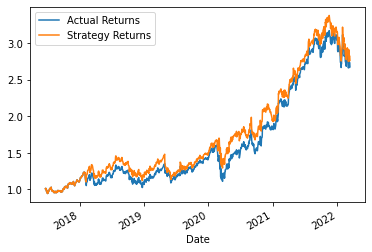

In [127]:
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot()